# Image Doument Classifcation

Installing the packages needed as below

In [4]:
!pip install opendatasets scikit-learn matplotlib
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries necessary for the project and loading the dataset from the drive

In [5]:
# Import the necessary libraries:
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import string
import pathlib
import os
import cv2
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC
import shutil
import random
import pathlib
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

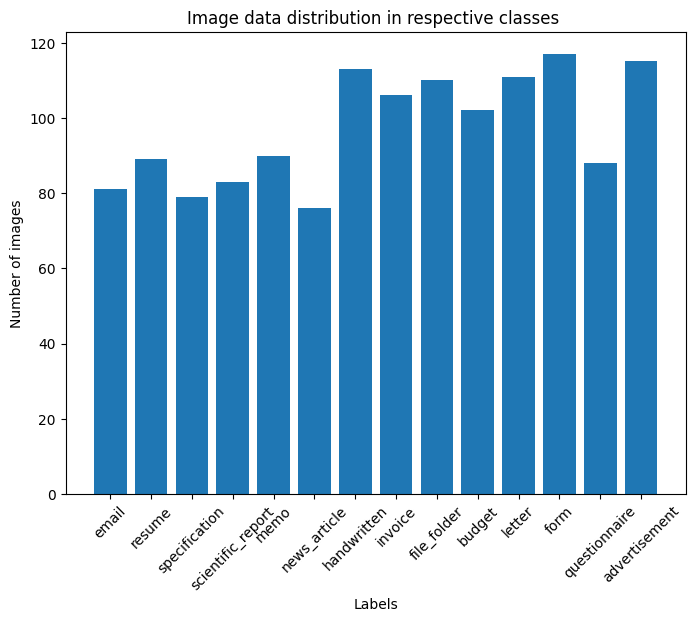

In [3]:
from skimage.feature import hog
import numpy as np
# Loop through all subdirectories and files in input directory
# Checking the number of images in each classes and evaluation if any sampling has to be done .
import os
import pandas as pd
import matplotlib.pyplot as plt
# Load the data that contains the images and labels

data_of_imagesNlabels = "/content/drive/MyDrive/large_dataset_for_CNN/test"

data_labels = os.listdir(data_of_imagesNlabels)
# store the labesl and the number of images in a created directory
data_dir = {"Label":[], "Images_number": []}
# Runover and loop through every subdirectories(label or class) and get the number of images.
for label in data_labels:
    path_label = os.path.join(data_of_imagesNlabels, label)
    images_number = len(os.listdir(path_label))
    data_dir["Label"].append(label)
    data_dir["Images_number"].append(images_number)

# transform Dictionary to pandas dataframe
data_frame = pd.DataFrame(data_dir)

plt.figure(figsize= (8, 6)),
plt.bar(data_frame["Label"], data_frame["Images_number"])

# determine the title , x-axis and y-axis
plt.xlabel('Labels')
plt.ylabel('Number of images')
plt.title('Image data distribution in respective classes ')
plt.xticks(rotation=45)
plt.show()
  

During various experiment on this data with unsampling and sampling the accuracy score and validation scode were low. Since the data imbalnce is not very significant I'm retaining the train set as it is . The model trained using gives better score for unseen test data as well as the features saved from this model scores well on traditional classifiers than unsampled model score.

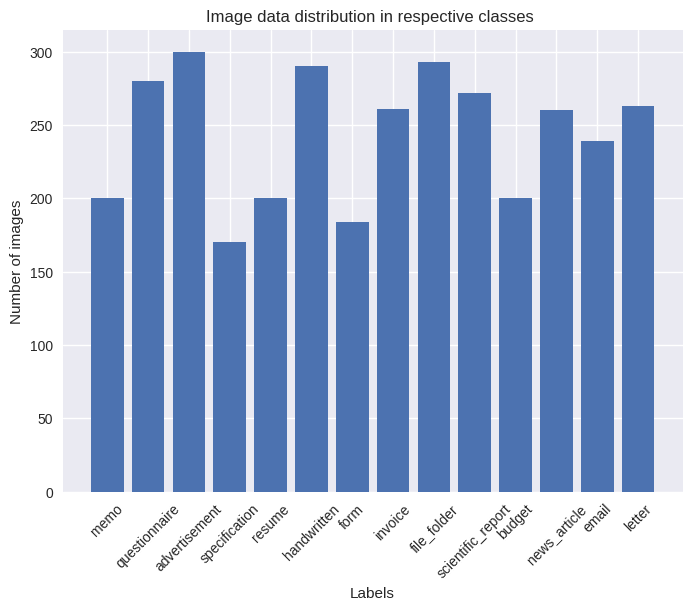

In [7]:
from skimage.feature import hog
import numpy as np
# Loop through all subdirectories and files in input directory
# Checking the number of images in each classes and evaluation if any sampling has to be done .
import os
import pandas as pd
import matplotlib.pyplot as plt
# Load the data that contains the images and labels

data_of_imagesNlabels = "/content/drive/MyDrive/large_dataset_for_CNN/train"

data_labels = os.listdir(data_of_imagesNlabels)
# store the labesl and the number of images in a created directory
data_dir = {"Label":[], "Images_number": []}
# Runover and loop through every subdirectories(label or class) and get the number of images.
for label in data_labels:
    path_label = os.path.join(data_of_imagesNlabels, label)
    images_number = len(os.listdir(path_label))
    data_dir["Label"].append(label)
    data_dir["Images_number"].append(images_number)

# transform Dictionary to pandas dataframe
data_frame = pd.DataFrame(data_dir)

plt.figure(figsize= (8, 6)),
plt.bar(data_frame["Label"], data_frame["Images_number"])

# determine the title , x-axis and y-axis
plt.xlabel('Labels')
plt.ylabel('Number of images')
plt.title('Image data distribution in respective classes ')
plt.xticks(rotation=45)
plt.show()
  

In [ ]:
# import zipfile

# with zipfile.ZipFile('/content/drive/MyDrive/AI Project/Data/archive.zip', 'r') as zip_ref:
#      zip_ref.extractall('/content/drive/MyDrive/AI Project/Data/')

Skipping /content/drive/MyDrive/AI Project/Data/train/budget/2041954175_4177.jpg as it could not be read.
Skipping /content/drive/MyDrive/AI Project/Data/train/letter/508452624.jpg as it could not be read.
Skipping /content/drive/MyDrive/AI Project/Data/validation/budget/2041954175_4177.jpg as it could not be read.
Skipping /content/drive/MyDrive/AI Project/Data/validation/letter/508452624.jpg as it could not be read.
Skipping /content/drive/MyDrive/AI Project/Data/test/budget/2041954175_4177.jpg as it could not be read.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_7 (TimeDis  (None, 4, 46, 46, 32)    320       
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 4, 23, 23, 32)    0         
 tributed)                                             

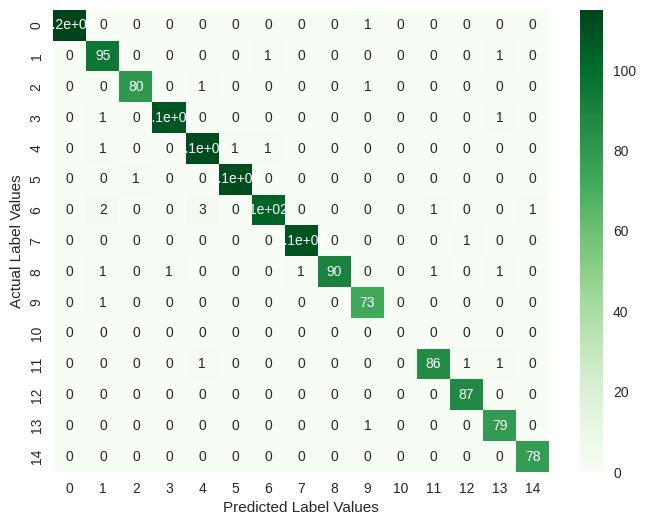

<ipython-input-11-6c0a7d5caf2f>:275: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


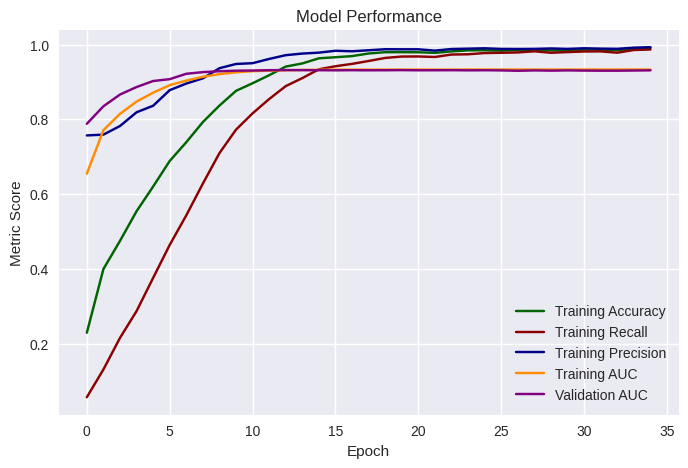

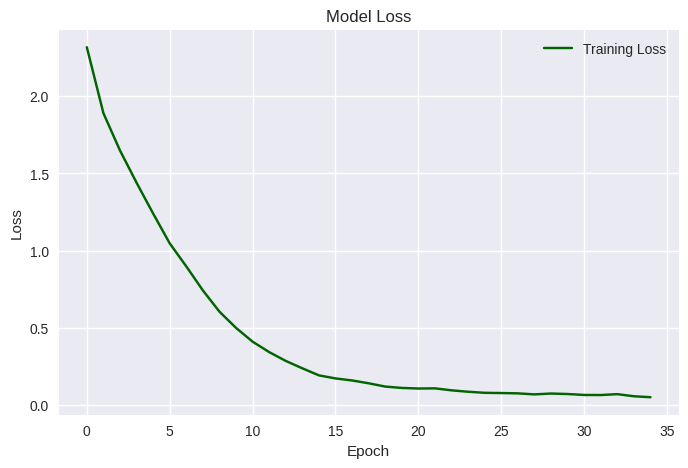

Time taken for prediction: 3.47 minutes
 The accuracy score for CNN model using large dataset is   97.86607799852834


In [ ]:
from matplotlib.rcsetup import validate_fontsize_None
import time

# Set the paths for the original data directory and the new split data directory
original_dir = "/content/drive/MyDrive/AI Project/Data/docs-sm"
base_data_dir = "/content/drive/MyDrive/AI Project/Data/docs-sm"

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

import os
# Set directories for train, validation, and test data
train_1= os.path.join(base_data_dir, "/content/drive/MyDrive/AI Project/Data/train")
validation_1 = os.path.join(base_data_dir, "/content/drive/MyDrive/AI Project/Data/validation")
test_1 = os.path.join(base_data_dir,"/content/drive/MyDrive/AI Project/Data/test")

# Creating directories for train, validation, and test data
os.makedirs(train_1, exist_ok=True)
# Create the train directory if it doesn't exist
if not os.path.exists(train_1):
    os.makedirs(train_1)
os.makedirs(validation_1, exist_ok=True)
os.makedirs(test_1, exist_ok=True)

# Set percentage of data for train, validation, and test data
train_per = 0.7
validation_per = 0.2
test_per = 0.1

# Get the list of subdirectories in the original data directory
names_of_class = os.listdir(original_dir)

# Loop through each subdirectory and split the data into train, validation, and test data
for names_class in names_of_class:
    class_dty = os.path.join(original_dir, names_class)
    files = os.listdir(class_dty)
    random.shuffle(files)
    train_vol = int(len(files) * train_per)
    validation_vol = int(len(files) * validation_per)
    test_vol = len(files) - train_vol - validation_vol
    train_fldr = files[:train_vol]
    validation_fldr = files[train_vol:train_vol+validation_vol]
    test_fldr = files[train_vol+validation_vol:]
    for file in train_fldr:
        scr = os.path.join(class_dty, file)
        dts = os.path.join(train_1, names_class, file)
        os.makedirs(os.path.join(train_1, names_class), exist_ok=True)
        shutil.copyfile(scr, dts)
    for file in validation_fldr:
        scr = os.path.join(class_dty, file)
        dts = os.path.join(validation_1, names_class, file)
        os.makedirs(os.path.join(validation_1, names_class), exist_ok=True)
        shutil.copyfile(scr, dts)
    for file in test_fldr:
        scr = os.path.join(class_dty, file)
        dts = os.path.join(test_1, names_class, file)
        os.makedirs(os.path.join(test_1, names_class), exist_ok=True)
        shutil.copyfile(scr, dts)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

import cv2

start_time = time.time()

def pre_process_images(images, label):
  arr = []
  labels = []
  for i in images:
    img = cv2.imread(os.path.join(i))
    if img is None:
            print(f"Skipping {i} as it could not be read.")
            continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if img is None:
            print(f"Skipping {i} as it could not be converted to grayscale.")
            continue
    img = cv2.resize(img, (120, 120))
    img1 = img[0:30, 0:120]/255
    img2 = img[30:90, 0:60]/255
    img3 = img[30:90, 60:120]/255
    img4 = img[90:120, 0:120]/255
    img = np.asarray([cv2.resize(img1, (48, 48)),
                      cv2.resize(img2, (48, 48)),
                      cv2.resize(img3, (48, 48)),
                      cv2.resize(img4, (48, 48))])
    img_mean = np.mean(img)
    img = img - img_mean
    img = img / np.std(img)
    arr.append(img)
    labels.append(label)
  return [arr, labels]

trainsetfolder = "/content/drive/MyDrive/AI Project/Data/train"
validatesetfolder = "/content/drive/MyDrive/AI Project/Data/validation"

train = pathlib.Path(os.path.join(trainsetfolder))

[advertisement, Y_advertisement] = pre_process_images(list(train.glob("advertisement/*.*")), 0)
[budget, Y_budget] = pre_process_images(list(train.glob("budget/*.*")), 1)
[email, Y_email] = pre_process_images(list(train.glob("email/*.*")), 2)
[file_folder, Y_file_folder] = pre_process_images(list(train.glob("file_folder/*.*")), 3)
[form, Y_form] = pre_process_images(list(train.glob("form/*.*")), 4)
[handwritten, Y_handwritten] = pre_process_images(list(train.glob("handwritten/*.*")), 5)
[invoice, Y_invoice] = pre_process_images(list(train.glob("invoice/*.*")), 6)
[letter, Y_letter] = pre_process_images(list(train.glob("letter/*.*")), 7)
[memo, Y_memo] = pre_process_images(list(train.glob("memo/*.*")), 8)
[news_article, Y_news_article] = pre_process_images(list(train.glob("news_article/*.*")), 9)
[presentation, Y_presentation] = pre_process_images(list(train.glob("presentation/*.*")), 10)
[questionnaire, Y_questionnaire] = pre_process_images(list(train.glob("questionnaire/*.*")), 11)
[resume, Y_resume] = pre_process_images(list(train.glob("resume/*.*")), 12)
[scientific_report, Y_scientific_report] = pre_process_images(list(train.glob("scientific_report/*.*")), 13)
[specification, Y_specification] = pre_process_images(list(train.glob("specification/*.*")), 14)

images_tn = advertisement + budget + email + file_folder + form + handwritten + invoice + letter + memo + news_article + presentation + questionnaire + resume + scientific_report + specification
labels_tn = Y_advertisement + Y_budget + Y_email + Y_file_folder + Y_form + Y_handwritten + Y_invoice + Y_letter + Y_memo + Y_news_article + Y_presentation + Y_questionnaire + Y_resume + Y_scientific_report + Y_specification

X_traintn = np.asarray(images_tn)
y_testtn = np.asarray(labels_tn)

y_testtn = to_categorical(labels_tn)



# X_traintn = np.expand_dims(X_traintn, axis=1)  # Adding an extra dimension to get 5D tensor

from tensorflow.keras.utils import to_categorical

y_testtn = to_categorical(labels_tn)

trainfolder = "/content/drive/MyDrive/AI Project/Data/validation"

validation_d = pathlib.Path(os.path.join(trainfolder))

[advertisement, Y_advertisement] = pre_process_images(list(validation_d.glob("advertisement/*.*")), 0)
[budget, Y_budget] = pre_process_images(list(validation_d.glob("budget/*.*")), 1)
[email, Y_email] = pre_process_images(list(validation_d.glob("email/*.*")), 2)
[file_folder, Y_file_folder] = pre_process_images(list(validation_d.glob("file_folder/*.*")), 3)
[form, Y_form] = pre_process_images(list(validation_d.glob("form/*.*")), 4)
[handwritten, Y_handwritten] = pre_process_images(list(validation_d.glob("handwritten/*.*")), 5)
[invoice, Y_invoice] = pre_process_images(list(validation_d.glob("invoice/*.*")), 6)
[letter, Y_letter] = pre_process_images(list(validation_d.glob("letter/*.*")), 7)
[memo, Y_memo] = pre_process_images(list(validation_d.glob("memo/*.*")), 8)
[news_article, Y_news_article] = pre_process_images(list(validation_d.glob("news_article/*.*")), 9)
[presentation, Y_presentation] = pre_process_images(list(validation_d.glob("presentation/*.*")), 10)
[questionnaire, Y_questionnaire] = pre_process_images(list(validation_d.glob("questionnaire/*.*")), 11)
[resume, Y_resume] = pre_process_images(list(validation_d.glob("resume/*.*")), 12)
[scientific_report, Y_scientific_report] = pre_process_images(list(validation_d.glob("scientific_report/*.*")), 13)
[specification, Y_specification] = pre_process_images(list(validation_d.glob("specification/*.*")), 14)

images_dv = advertisement + budget + email + file_folder + form + handwritten + invoice + letter + memo + news_article + presentation + questionnaire + resume + scientific_report + specification
labels_dv = Y_advertisement + Y_budget + Y_email + Y_file_folder + Y_form + Y_handwritten + Y_invoice + Y_letter + Y_memo + Y_news_article + Y_presentation + Y_questionnaire + Y_resume + Y_scientific_report + Y_specification

X_trainV = np.asarray(images_dv)
y_testV = np.asarray(labels_dv)

y_testV = to_categorical(labels_dv)

trainfolder = "/content/drive/MyDrive/AI Project/Data/test"

test_d = pathlib.Path(os.path.join(trainfolder))

[advertisement, Y_advertisement] = pre_process_images(list(test_d.glob("advertisement/*.*")), 0)
[budget, Y_budget] = pre_process_images(list(test_d.glob("budget/*.*")), 1)
[email, Y_email] = pre_process_images(list(test_d.glob("email/*.*")), 2)
[file_folder, Y_file_folder] = pre_process_images(list(test_d.glob("file_folder/*.*")), 3)
[form, Y_form] = pre_process_images(list(test_d.glob("form/*.*")), 4)
[handwritten, Y_handwritten] = pre_process_images(list(test_d.glob("handwritten/*.*")), 5)
[invoice, Y_invoice] = pre_process_images(list(test_d.glob("invoice/*.*")), 6)
[letter, Y_letter] = pre_process_images(list(test_d.glob("letter/*.*")), 7)
[memo, Y_memo] = pre_process_images(list(test_d.glob("memo/*.*")), 8)
[news_article, Y_news_article] = pre_process_images(list(test_d.glob("news_article/*.*")), 9)
[presentation, Y_presentation] = pre_process_images(list(test_d.glob("presentation/*.*")), 10)
[questionnaire, Y_questionnaire] = pre_process_images(list(test_d.glob("questionnaire/*.*")), 11)
[resume, Y_resume] = pre_process_images(list(test_d.glob("resume/*.*")), 12)
[scientific_report, Y_scientific_report] = pre_process_images(list(test_d.glob("scientific_report/*.*")), 13)
[specification, Y_specification] = pre_process_images(list(test_d.glob("specification/*.*")), 14)

images_dt = advertisement + budget + email + file_folder + form + handwritten + invoice + letter + memo + news_article + presentation + questionnaire + resume + scientific_report + specification
labels_dt = Y_advertisement + Y_budget + Y_email + Y_file_folder + Y_form + Y_handwritten + Y_invoice + Y_letter + Y_memo + Y_news_article + Y_presentation + Y_questionnaire + Y_resume + Y_scientific_report + Y_specification

X_trainT= np.asarray(images_dt)
y_testT = np.asarray(labels_dt)

y_testT = to_categorical(labels_dt)

cnn_model= tf.keras.models.Sequential()
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, 3, activation = "relu" ), input_shape=(4, 48, 48, 1)))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, 3, activation = "relu")))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
cnn_model.add(tf.keras.layers.GlobalAveragePooling1D())
cnn_model.add(tf.keras.layers.Dense(128, activation = "sigmoid"))
cnn_model.add(tf.keras.layers.Dropout(0.2))
cnn_model.add(tf.keras.layers.Dense(15, activation = "softmax"))

cnn_model.summary()

from tensorflow import keras
from tensorflow.keras import layers

opt = keras.optimizers.Adam(learning_rate=0.01)
tf.keras.metrics.TruePositives(thresholds=None, name=None, dtype=None)

from tensorflow.keras import metrics
cnn_model.compile(optimizer= "adam", loss = 'categorical_crossentropy',
              metrics = [ metrics.TruePositives(name='tp'), 
                         metrics.FalsePositives(name='fp'), 
                         metrics.TrueNegatives(name='tn'), 
                         metrics.FalseNegatives(name='fn'), 
                         "accuracy", 
                         metrics.Precision(name='precision'), 
                         metrics.Recall(name='recall'), 
                         metrics.AUC(name='auc',multi_label=True)])

# Enable XLA to optimise added by me
tf.config.optimizer.set_jit(True)

from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 16, mode = 'min', restore_best_weights=False, start_from_epoch=0,)

model_epoch = cnn_model.fit(
    X_traintn, 
    y_testtn, 
    epochs=35, 
    batch_size=16, 
    validation_data=(X_trainV, y_testV), 
    callbacks=[earlyStopping]
)

cnn_model.evaluate(X_trainT, y_testT, batch_size=15)



y_pred = cnn_model.predict(X_trainT, batch_size= 16, verbose =1 ) 
y_pred = np.argmax(y_pred, axis=1)

y_test = np.argmax(y_testT, axis = 1)
y_test

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))



classes = list(range(15))
res_1 = tf.math.confusion_matrix(y_pred,y_test).numpy()
cm_1 = pd.DataFrame(res_1,
                     index = classes, 
                     columns = classes)
cm_1

from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, y_pred)


import seaborn as sns
figure = plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, cmap=plt.cm.Greens)
plt.ylabel('Actual Label Values')
plt.xlabel('Predicted Label Values')
plt.show()

from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, y_pred)


import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('seaborn')

plt.figure(figsize=(8, 5))
plt.plot(model_epoch.history['accuracy'], "darkgreen", label="Training Accuracy")
plt.plot(model_epoch.history['recall'], "darkred", label="Training Recall")
plt.plot(model_epoch.history['precision'], "darkblue", label="Training Precision")
plt.plot(model_epoch.history['auc'], "darkorange", label="Training AUC")
plt.plot(model_epoch.history['val_auc'], "purple", label="Validation AUC")
plt.xlabel('Epoch')
plt.ylabel('Metric Score')
plt.title('Model Performance')
plt.legend()

plt.figure(figsize=(8, 5))
plt.plot(model_epoch.history['loss'], "darkgreen", label="Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# prediction time is measured
elapsed_time = time.time() - start_time
elapsed_time_minutes = elapsed_time / 60

print("Time taken for prediction: {:.2f} minutes".format(elapsed_time_minutes))

print(" The accuracy score for CNN model using large dataset is  ", score*100)


In [ ]:
# # save the labels to 'labels.npy'and images: THESE SAVED FILES ARE IN THE DRIVE
# np.save('/content/drive/MyDrive/AI Project/Data/cnn_labels.npy', X_trainT)
# np.save('/content/drive/MyDrive/AI Project/Data/image_features_cnn.npy', y_testtn )

# Using CNN features to train SVM , LR , RF an K-nn


1.   Support Vector Mission using Sklearn
2.   Softmax or logistic regression using sklearn
3.   Random Forest using sklearn




In [ ]:
import numpy as np
from sklearn import svm, linear_model, ensemble
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

# Load the extracted features and labels
# Load data and labels
cnn_features = np.load('/content/drive/MyDrive/AI Project/Data/image_features_cnn.npy')
labels = np.load('/content/drive/MyDrive/AI Project/Data/cnn_labels.npy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cnn_features, labels, test_size=0.2, random_state=42)

# Flatten the feature vector to 1D array
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Define the classifiers
svm_clf = svm.SVC(kernel='linear')
lr_clf = linear_model.LogisticRegression(max_iter=1000)
rf_clf = ensemble.RandomForestClassifier()

# Train and time SVM classifier
start_time = time.time()
svm_clf.fit(X_train, y_train)
svm_train_time = time.time() - start_time

# Test and time SVM classifier
start_time = time.time()
svm_pred = svm_clf.predict(X_test)
svm_test_time = time.time() - start_time

# Calculate the accuracy of SVM classifier
svm_acc = accuracy_score(y_test, svm_pred)



# Train and time LR classifier
start_time = time.time()
lr_clf.fit(X_train, y_train)
lr_train_time = time.time() - start_time

# Test and time LR classifier
start_time = time.time()
lr_pred = lr_clf.predict(X_test)
lr_test_time = time.time() - start_time

# Calculate the accuracy of LR classifier
lr_acc = accuracy_score(y_test, lr_pred)

# Train and time RF classifier
start_time = time.time()
rf_clf.fit(X_train, y_train)
rf_train_time = time.time() - start_time

# Test and time RF classifier
start_time = time.time()
rf_pred = rf_clf.predict(X_test)
rf_test_time = time.time() - start_time

# Calculate the accuracy of RF classifier
rf_acc = accuracy_score(y_test, rf_pred)


# Print the training and testing time of each classifier
print("SVM Train Time: {:.4f}s | Test Time: {:.4f}s".format(svm_train_time, svm_test_time))
print("LR Train Time: {:.4f}s | Test Time: {:.4f}s".format(lr_train_time, lr_test_time))
print("RF Train Time: {:.4f}s | Test Time: {:.4f}s".format(rf_train_time, rf_test_time))


SVM Train Time: 120.6840s | Test Time: 19.4338s
LR Train Time: 174.2268s | Test Time: 0.1037s
RF Train Time: 38.1171s | Test Time: 0.0868s


In [ ]:
print(svm_acc)
print(lr_acc)
print(rf_acc)

0.3103850641773629
0.2765460910151692
0.4014002333722287


# CNN features on traditional classifiers build from scartch

1.   SVM from scartch
2.   LR from scartch
3.   RF from scartch
4    k-NN from scartch



# HOG FEATURE EXTRACTION 
AND SAVING THE MODEL AND RESPECTIVE LABELS TO APPLY ON TRADITIONAL CLASSIFIERS

In [ ]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import os
import cv2
import random
import shutil
from PIL import Image
from skimage import feature
from imutils import paths
import argparse
import imutils


from skimage.feature import hog
import numpy as np

# Set input and output directories

hog_input_dir = '/content/drive/MyDrive/AI Project/Data/docs-sm'
hog_output_dir = '/content/drive/MyDrive/AI Project/Data'


hog_images_labels = os.listdir(hog_input_dir)
# Loop through all subdirectories and files in input directory
def hog_images_labels(images, label):
  arr = []
  labels = []
  for i in images:
      image_hog = cv2.imread(str(os.path.join(i)))
      image_hog = cv2.cvtColor(image_hog, cv2.COLOR_BGR2GRAY)
      image_hog = imutils.auto_canny(image_hog)
      image_hog = np.asarray(cv2.resize(image_hog, (64*4, 128*4)))
      hog_features = []
      fd, hog_image = hog(image_hog, orientations=15, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True,
                    block_norm="L1",
                    transform_sqrt=False)
      
      hog_features.append(fd)
      arr.append(np.array(hog_features).flatten())
      labels.append(label)
  return [arr, labels]
  
  
import pathlib
tn_hog = "/content/drive/MyDrive/AI Project/Data/tn_hog"
tn_hog = pathlib.Path(str(os.path.join(tn_hog)))

[advertisement, Y_advertisement] = hog_images_labels(list(tn_hog.glob("advertisement/*.*")), 0)
[budget, Y_budget] = hog_images_labels(list(tn_hog.glob("budget/*.*")), 1)
[email, Y_email] = hog_images_labels(list(tn_hog.glob("email/*.*")), 2)
[file_folder, Y_file_folder] = hog_images_labels(list(tn_hog.glob("file_folder/*.*")), 3)
[form, Y_form] = hog_images_labels(list(tn_hog.glob("form/*.*")), 4)
[handwritten, Y_handwritten] = hog_images_labels(list(tn_hog.glob("handwritten/*.*")), 5)
[invoice, Y_invoice] = hog_images_labels(list(tn_hog.glob("invoice/*.*")), 6)
[letter, Y_letter] = hog_images_labels(list(tn_hog.glob("letter/*.*")), 7)
[memo, Y_memo] = hog_images_labels(list(tn_hog.glob("memo/*.*")), 8)
[news_article, Y_news_article] = hog_images_labels(list(tn_hog.glob("news_article/*.*")), 9)
[presentation, Y_presentation] = hog_images_labels(list(tn_hog.glob("presentation/*.*")), 10)
[questionnaire, Y_questionnaire] = hog_images_labels(list(tn_hog.glob("questionnaire/*.*")), 11)
[resume, Y_resume] = hog_images_labels(list(tn_hog.glob("resume/*.*")), 12)
[scientific_report, Y_scientific_report] = hog_images_labels(list(tn_hog.glob("scientific_report/*.*")), 13)
[specification, Y_specification] = hog_images_labels(list(tn_hog.glob("specification/*.*")), 14)


images = advertisement + budget + email + file_folder + form + handwritten + invoice + letter + memo + news_article + presentation + questionnaire + resume + scientific_report + specification
label = Y_advertisement + Y_budget + Y_email + Y_file_folder + Y_form + Y_handwritten + Y_invoice + Y_letter + Y_memo + Y_news_article + Y_presentation + Y_questionnaire + Y_resume + Y_scientific_report + Y_specification

train_hog = np.asarray(images)
label_hog = np.asarray(label)

# Save HOG features for training set
train_hog_path = os.path.join(hog_output_dir, "train_hog.npy")
train_labels_path = os.path.join(hog_output_dir, "train_labels.npy")
np.save(train_hog_path, train_hog)
np.save(train_labels_path, label_hog)

tst_hog = "/content/drive/MyDrive/AI Project/Data/tst_hog"
tst_hog = pathlib.Path(str(os.path.join(tst_hog)))

[advertisement, Y_advertisement] = hog_images_labels(list(tst_hog.glob("advertisement/*.*")), 0)
[budget, Y_budget] = hog_images_labels(list(tst_hog.glob("budget/*.*")), 1)
[email, Y_email] = hog_images_labels(list(tst_hog.glob("email/*.*")), 2)
[file_folder, Y_file_folder] = hog_images_labels(list(tst_hog.glob("file_folder/*.*")), 3)
[form, Y_form] = hog_images_labels(list(tst_hog.glob("form/*.*")), 4)
[handwritten, Y_handwritten] = hog_images_labels(list(tst_hog.glob("handwritten/*.*")), 5)
[invoice, Y_invoice] = hog_images_labels(list(tst_hog.glob("invoice/*.*")), 6)
[letter, Y_letter] = hog_images_labels(list(tst_hog.glob("letter/*.*")), 7)
[memo, Y_memo] = hog_images_labels(list(tst_hog.glob("memo/*.*")), 8)
[news_article, Y_news_article] = hog_images_labels(list(tst_hog.glob("news_article/*.*")), 9)
[presentation, Y_presentation] = hog_images_labels(list(tst_hog.glob("presentation/*.*")), 10)
[questionnaire, Y_questionnaire] = hog_images_labels(list(tst_hog.glob("questionnaire/*.*")), 11)
[resume, Y_resume] = hog_images_labels(list(tst_hog.glob("resume/*.*")), 12)
[scientific_report, Y_scientific_report] = hog_images_labels(list(tst_hog.glob("scientific_report/*.*")), 13)
[specification, Y_specification] = hog_images_labels(list(tst_hog.glob("specification/*.*")), 14)


images_t = advertisement + budget + email + file_folder + form + handwritten + invoice + letter + memo + news_article + presentation + questionnaire + resume + scientific_report + specification
label_t = Y_advertisement + Y_budget + Y_email + Y_file_folder + Y_form + Y_handwritten + Y_invoice + Y_letter + Y_memo + Y_news_article + Y_presentation + Y_questionnaire + Y_resume + Y_scientific_report + Y_specification


test_hog = np.asarray(images_t)
testhog_label = np.asarray(label_t)

# Save HOG features for test set
test_hog_path = os.path.join(hog_output_dir, "test_hog.npy")
test_labels_path = os.path.join(hog_output_dir, "test_labels.npy")
np.save(test_hog_path, test_hog)
np.save(test_labels_path, testhog_label)

#HOG features on traditional classifiers using sklearn

1.   SVM from scartch
2.   LR from scartch
3.   RF from scartch
4.   k-NN from scartch

Training time for SVM: 4.24 seconds
Testing time for SVM: 1.55 seconds
Accuracy for SVM: 31.58
Training time for Logistic Regression: 10.45 seconds
Testing time for Logistic Regression: 0.00 seconds
Accuracy for Logistic Regression: 40.35
Training time for Random Forest: 1.94 seconds
Testing time for Random Forest: 0.02 seconds
Accuracy for Random Forest: 40.35
Training time for k-NN: 0.00 seconds
Testing time for k-NN: 0.20 seconds
Accuracy for k-NN: 19.30


<BarContainer object of 4 artists>

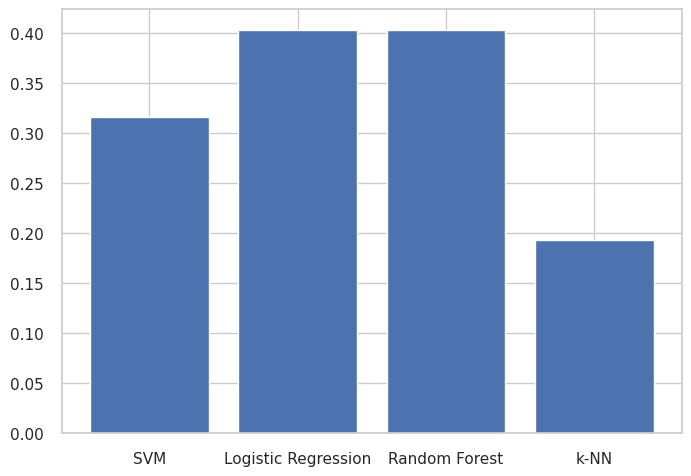

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Load saved labels
train_labels = np.load('/content/drive/MyDrive/AI Project/Data/train_labels.npy')
test_labels = np.load('/content/drive/MyDrive/AI Project/Data/test_labels.npy')

# Load saved hog features
train_hog = np.load('/content/drive/MyDrive/AI Project/Data/train_hog.npy')
test_hog = np.load('/content/drive/MyDrive/AI Project/Data/test_hog.npy')

# Train SVM and measure training time
start_time = time.time()
clf_svm = svm.SVC()
clf_svm.fit(train_hog, train_labels)
svm_training_time = time.time() - start_time

# Test SVM and measure testing time and accuracy
start_time = time.time()
svm_accuracy = clf_svm.score(test_hog, test_labels)
svm_testing_time = time.time() - start_time

# Train Logistic Regression and measure training time
start_time = time.time()
clf_lr = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
clf_lr.fit(train_hog, train_labels)
lr_training_time = time.time() - start_time

# Test Logistic Regression and measure testing time and accuracy
start_time = time.time()
lr_accuracy = clf_lr.score(test_hog, test_labels)
lr_testing_time = time.time() - start_time

# Train Random Forest and measure training time
start_time = time.time()
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_rf.fit(train_hog, train_labels)
rf_training_time = time.time() - start_time

# Test Random Forest and measure testing time and accuracy
start_time = time.time()
rf_accuracy = clf_rf.score(test_hog, test_labels)
rf_testing_time = time.time() - start_time

# Train k-NN and measure training time
start_time = time.time()
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(train_hog, train_labels)
knn_training_time = time.time() - start_time

# Test k-NN and measure testing time and accuracy
start_time = time.time()
knn_accuracy = clf_knn.score(test_hog, test_labels)
knn_testing_time = time.time() - start_time

# Print results
print("Training time for SVM: %.2f seconds" % svm_training_time)
print("Testing time for SVM: %.2f seconds" % svm_testing_time)
print("Accuracy for SVM: %.2f" % (svm_accuracy*100))
print("Training time for Logistic Regression: %.2f seconds" % lr_training_time)
print("Testing time for Logistic Regression: %.2f seconds" % lr_testing_time)
print("Accuracy for Logistic Regression: %.2f" % (lr_accuracy*100))
print("Training time for Random Forest: %.2f seconds" % rf_training_time)
print("Testing time for Random Forest: %.2f seconds" % rf_testing_time)
print("Accuracy for Random Forest: %.2f" % (rf_accuracy*100))
print("Training time for k-NN: %.2f seconds" % knn_training_time)
print("Testing time for k-NN: %.2f seconds" % knn_testing_time)
print("Accuracy for k-NN: %.2f" % (knn_accuracy*100))

# Plot bar chart for accuracy
labels = ['SVM', 'Logistic Regression', 'Random Forest', 'k-NN']
accuracies = [svm_accuracy, lr_accuracy, rf_accuracy, knn_accuracy]
plt.title('Classifiers using HOG features')
plt.bar(labels, accuracies)





In [ ]:
print(svm_accuracy*100)
print(lr_accuracy*100)
print(rf_accuracy*100)
print(knn_accuracy*100)

31.57894736842105
40.35087719298245
40.35087719298245
19.298245614035086


<BarContainer object of 4 artists>

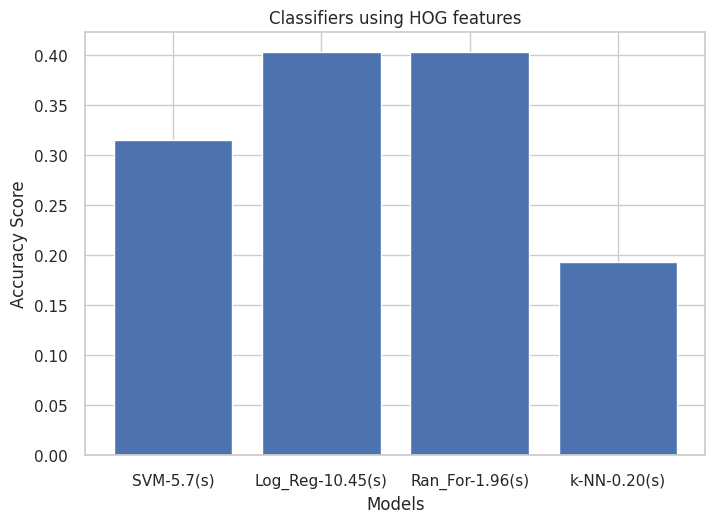

In [ ]:
# Plot bar chart for accuracy
labels = ['SVM-5.7(s)', 'Log_Reg-10.45(s)', 'Ran_For-1.96(s)', 'k-NN-0.20(s)']
accuracies = [svm_accuracy, lr_accuracy, rf_accuracy, knn_accuracy]
plt.title('Classifiers using HOG features')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.bar(labels, accuracies)

<BarContainer object of 4 artists>

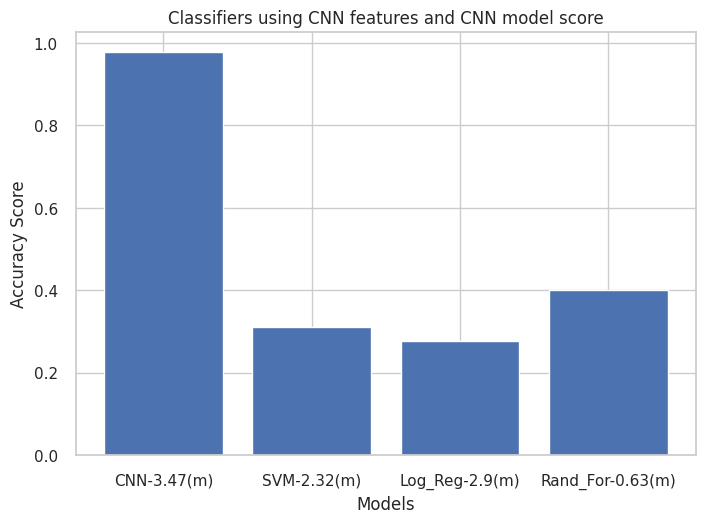

In [ ]:
# Plot bar chart for accuracy
labels = ['CNN-3.47(m)','SVM-2.32(m)', 'Log_Reg-2.9(m)', 'Rand_For-0.63(m)']
accuracies = [score,svm_acc, lr_acc, rf_acc]
plt.title('Classifiers using CNN features and CNN model score')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.bar(labels, accuracies)

# Benchmark data accuracy

Skipping /content/drive/MyDrive/large_dataset_for_CNN/train/budget/2041954175_4177.jpg as it could not be read.
Skipping /content/drive/MyDrive/large_dataset_for_CNN/train/letter/508452624.jpg as it could not be read.
Skipping /content/drive/MyDrive/large_dataset_for_CNN/validation/budget/2041954175_4177.jpg as it could not be read.
Skipping /content/drive/MyDrive/large_dataset_for_CNN/validation/letter/508452624.jpg as it could not be read.
Skipping /content/drive/MyDrive/large_dataset_for_CNN/test/budget/2041954175_4177.jpg as it could not be read.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 4, 46, 46, 512)   5120      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 4, 23, 23, 512)   0         
 tributed)                 

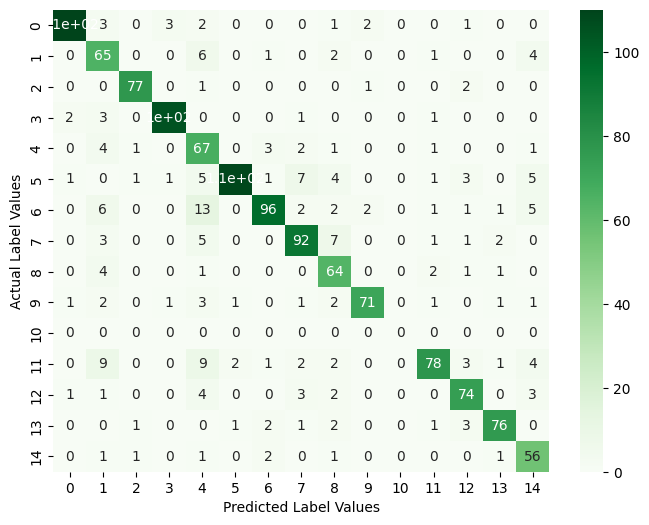

<ipython-input-6-72a194b4e644>:277: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


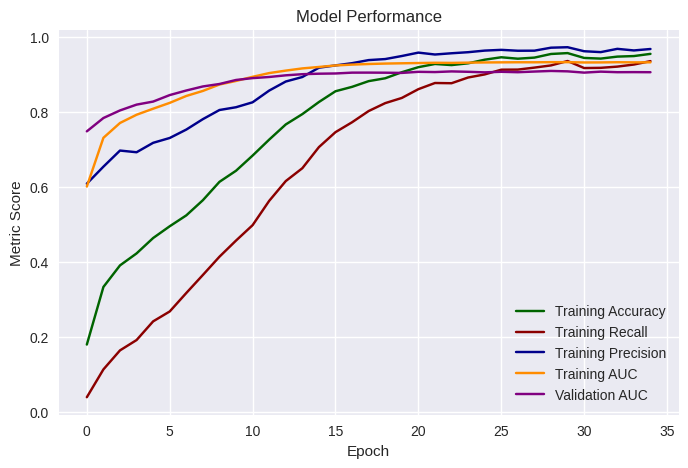

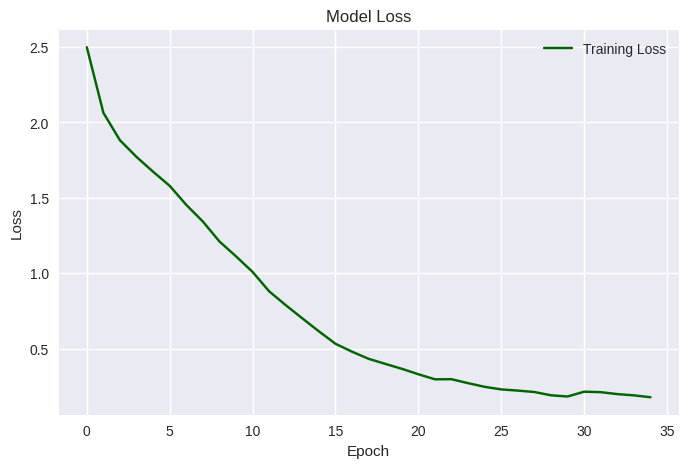

Time taken for prediction: 17.84 minutes
 The accuracy score for CNN model using large dataset is   83.88520971302428


In [6]:
from matplotlib.rcsetup import validate_fontsize_None
import time

# Set the paths for the original data directory and the new split data directory
original_dir = "/content/drive/MyDrive/large_dataset_for_CNN/docs-sm"
base_data_dir = "/content/drive/MyDrive/large_dataset_for_CNN/docs-sm"

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

import os
# Set directories for train, validation, and test data
train= os.path.join(base_data_dir, "/content/drive/MyDrive/large_dataset_for_CNN/train")
validation = os.path.join(base_data_dir, "/content/drive/MyDrive/large_dataset_for_CNN/validation")
test = os.path.join(base_data_dir,"/content/drive/MyDrive/large_dataset_for_CNN/test")

# Creating directories for train, validation, and test data
os.makedirs(train, exist_ok=True)
# Create the train directory if it doesn't exist
if not os.path.exists(train):
    os.makedirs(train)
os.makedirs(validation, exist_ok=True)
os.makedirs(test, exist_ok=True)

# Set percentage of data for train, validation, and test data
train_per = 0.7
validation_per = 0.2
test_per = 0.1

# Get the list of subdirectories in the original data directory
names_of_class = os.listdir(original_dir)

# # Loop through each subdirectory and split the data into train, validation, and test data
# for names_class in names_of_class:
#     class_dty = os.path.join(original_dir, names_class)
#     files = os.listdir(class_dty)
#     random.shuffle(files)
#     train_vol = int(len(files) * train_per)
#     validation_vol = int(len(files) * validation_per)
#     test_vol = len(files) - train_vol - validation_vol
#     train_fldr = files[:train_vol]
#     validation_fldr = files[train_vol:train_vol+validation_vol]
#     test_fldr = files[train_vol+validation_vol:]
#     for file in train_fldr:
#         scr = os.path.join(class_dty, file)
#         dts = os.path.join(train, names_class, file)
#         os.makedirs(os.path.join(train, names_class), exist_ok=True)
#         shutil.copyfile(scr, dts)
#     for file in validation_fldr:
#         scr = os.path.join(class_dty, file)
#         dts = os.path.join(validation, names_class, file)
#         os.makedirs(os.path.join(validation, names_class), exist_ok=True)
#         shutil.copyfile(scr, dts)
#     for file in test_fldr:
#         scr = os.path.join(class_dty, file)
#         dts = os.path.join(test, names_class, file)
#         os.makedirs(os.path.join(test, names_class), exist_ok=True)
#         shutil.copyfile(scr, dts)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

import cv2

start_time = time.time()

def pre_process_images(images, label):
  arr = []
  labels = []
  for i in images:
    img = cv2.imread(os.path.join(i))
    if img is None:
            print(f"Skipping {i} as it could not be read.")
            continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if img is None:
            print(f"Skipping {i} as it could not be converted to grayscale.")
            continue
    img = cv2.resize(img, (120, 120))
    img1 = img[0:30, 0:120]/255
    img2 = img[30:90, 0:60]/255
    img3 = img[30:90, 60:120]/255
    img4 = img[90:120, 0:120]/255
    img = np.asarray([cv2.resize(img1, (48, 48)),
                      cv2.resize(img2, (48, 48)),
                      cv2.resize(img3, (48, 48)),
                      cv2.resize(img4, (48, 48))])
    img_mean = np.mean(img)
    img = img - img_mean
    img = img / np.std(img)
    arr.append(img)
    labels.append(label)
  return [arr, labels]

trainsetfolder = "/content/drive/MyDrive/large_dataset_for_CNN/train"
validatesetfolder = "/content/drive/MyDrive/large_dataset_for_CNN/validation"

train = pathlib.Path(os.path.join(trainsetfolder))

[advertisement, Y_advertisement] = pre_process_images(list(train.glob("advertisement/*.*")), 0)
[budget, Y_budget] = pre_process_images(list(train.glob("budget/*.*")), 1)
[email, Y_email] = pre_process_images(list(train.glob("email/*.*")), 2)
[file_folder, Y_file_folder] = pre_process_images(list(train.glob("file_folder/*.*")), 3)
[form, Y_form] = pre_process_images(list(train.glob("form/*.*")), 4)
[handwritten, Y_handwritten] = pre_process_images(list(train.glob("handwritten/*.*")), 5)
[invoice, Y_invoice] = pre_process_images(list(train.glob("invoice/*.*")), 6)
[letter, Y_letter] = pre_process_images(list(train.glob("letter/*.*")), 7)
[memo, Y_memo] = pre_process_images(list(train.glob("memo/*.*")), 8)
[news_article, Y_news_article] = pre_process_images(list(train.glob("news_article/*.*")), 9)
[presentation, Y_presentation] = pre_process_images(list(train.glob("presentation/*.*")), 10)
[questionnaire, Y_questionnaire] = pre_process_images(list(train.glob("questionnaire/*.*")), 11)
[resume, Y_resume] = pre_process_images(list(train.glob("resume/*.*")), 12)
[scientific_report, Y_scientific_report] = pre_process_images(list(train.glob("scientific_report/*.*")), 13)
[specification, Y_specification] = pre_process_images(list(train.glob("specification/*.*")), 14)

images_tn = advertisement + budget + email + file_folder + form + handwritten + invoice + letter + memo + news_article + presentation + questionnaire + resume + scientific_report + specification
labels_tn = Y_advertisement + Y_budget + Y_email + Y_file_folder + Y_form + Y_handwritten + Y_invoice + Y_letter + Y_memo + Y_news_article + Y_presentation + Y_questionnaire + Y_resume + Y_scientific_report + Y_specification

X_traintn = np.asarray(images_tn)
y_testtn = np.asarray(labels_tn)

y_testtn = to_categorical(labels_tn)



# X_traintn = np.expand_dims(X_traintn, axis=1)  # Adding an extra dimension to get 5D tensor

from tensorflow.keras.utils import to_categorical

y_testtn = to_categorical(labels_tn)

trainfolder = "/content/drive/MyDrive/large_dataset_for_CNN/validation"

validation_d = pathlib.Path(os.path.join(trainfolder))

[advertisement, Y_advertisement] = pre_process_images(list(validation_d.glob("advertisement/*.*")), 0)
[budget, Y_budget] = pre_process_images(list(validation_d.glob("budget/*.*")), 1)
[email, Y_email] = pre_process_images(list(validation_d.glob("email/*.*")), 2)
[file_folder, Y_file_folder] = pre_process_images(list(validation_d.glob("file_folder/*.*")), 3)
[form, Y_form] = pre_process_images(list(validation_d.glob("form/*.*")), 4)
[handwritten, Y_handwritten] = pre_process_images(list(validation_d.glob("handwritten/*.*")), 5)
[invoice, Y_invoice] = pre_process_images(list(validation_d.glob("invoice/*.*")), 6)
[letter, Y_letter] = pre_process_images(list(validation_d.glob("letter/*.*")), 7)
[memo, Y_memo] = pre_process_images(list(validation_d.glob("memo/*.*")), 8)
[news_article, Y_news_article] = pre_process_images(list(validation_d.glob("news_article/*.*")), 9)
[presentation, Y_presentation] = pre_process_images(list(validation_d.glob("presentation/*.*")), 10)
[questionnaire, Y_questionnaire] = pre_process_images(list(validation_d.glob("questionnaire/*.*")), 11)
[resume, Y_resume] = pre_process_images(list(validation_d.glob("resume/*.*")), 12)
[scientific_report, Y_scientific_report] = pre_process_images(list(validation_d.glob("scientific_report/*.*")), 13)
[specification, Y_specification] = pre_process_images(list(validation_d.glob("specification/*.*")), 14)

images_dv = advertisement + budget + email + file_folder + form + handwritten + invoice + letter + memo + news_article + presentation + questionnaire + resume + scientific_report + specification
labels_dv = Y_advertisement + Y_budget + Y_email + Y_file_folder + Y_form + Y_handwritten + Y_invoice + Y_letter + Y_memo + Y_news_article + Y_presentation + Y_questionnaire + Y_resume + Y_scientific_report + Y_specification

X_trainV = np.asarray(images_dv)
y_testV = np.asarray(labels_dv)

y_testV = to_categorical(labels_dv)

trainfolder = "/content/drive/MyDrive/large_dataset_for_CNN/test"

test_d = pathlib.Path(os.path.join(trainfolder))

[advertisement, Y_advertisement] = pre_process_images(list(test_d.glob("advertisement/*.*")), 0)
[budget, Y_budget] = pre_process_images(list(test_d.glob("budget/*.*")), 1)
[email, Y_email] = pre_process_images(list(test_d.glob("email/*.*")), 2)
[file_folder, Y_file_folder] = pre_process_images(list(test_d.glob("file_folder/*.*")), 3)
[form, Y_form] = pre_process_images(list(test_d.glob("form/*.*")), 4)
[handwritten, Y_handwritten] = pre_process_images(list(test_d.glob("handwritten/*.*")), 5)
[invoice, Y_invoice] = pre_process_images(list(test_d.glob("invoice/*.*")), 6)
[letter, Y_letter] = pre_process_images(list(test_d.glob("letter/*.*")), 7)
[memo, Y_memo] = pre_process_images(list(test_d.glob("memo/*.*")), 8)
[news_article, Y_news_article] = pre_process_images(list(test_d.glob("news_article/*.*")), 9)
[presentation, Y_presentation] = pre_process_images(list(test_d.glob("presentation/*.*")), 10)
[questionnaire, Y_questionnaire] = pre_process_images(list(test_d.glob("questionnaire/*.*")), 11)
[resume, Y_resume] = pre_process_images(list(test_d.glob("resume/*.*")), 12)
[scientific_report, Y_scientific_report] = pre_process_images(list(test_d.glob("scientific_report/*.*")), 13)
[specification, Y_specification] = pre_process_images(list(test_d.glob("specification/*.*")), 14)

images_dt = advertisement + budget + email + file_folder + form + handwritten + invoice + letter + memo + news_article + presentation + questionnaire + resume + scientific_report + specification
labels_dt = Y_advertisement + Y_budget + Y_email + Y_file_folder + Y_form + Y_handwritten + Y_invoice + Y_letter + Y_memo + Y_news_article + Y_presentation + Y_questionnaire + Y_resume + Y_scientific_report + Y_specification

X_trainT= np.asarray(images_dt)
y_testT = np.asarray(labels_dt)

y_testT = to_categorical(labels_dt)

cnn_model= tf.keras.models.Sequential()
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(512, 3, activation = "relu" ), input_shape=(4, 48, 48, 1)))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(256, 3, activation = "relu")))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
cnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
cnn_model.add(tf.keras.layers.GlobalAveragePooling1D())
cnn_model.add(tf.keras.layers.Dense(1024, activation = "sigmoid"))
cnn_model.add(tf.keras.layers.Dropout(0.2))
cnn_model.add(tf.keras.layers.Dense(15, activation = "softmax"))

cnn_model.summary()

from tensorflow import keras
from tensorflow.keras import layers

opt = keras.optimizers.Adam(learning_rate=0.01)
tf.keras.metrics.TruePositives(thresholds=None, name=None, dtype=None)

from tensorflow.keras import metrics
cnn_model.compile(optimizer= "adam", loss = 'categorical_crossentropy',
              metrics = [ metrics.TruePositives(name='tp'), 
                         metrics.FalsePositives(name='fp'), 
                         metrics.TrueNegatives(name='tn'), 
                         metrics.FalseNegatives(name='fn'), 
                         "accuracy", 
                         metrics.Precision(name='precision'), 
                         metrics.Recall(name='recall'), 
                         metrics.AUC(name='auc',multi_label=True)])

# Enable XLA to optimise added by me
tf.config.optimizer.set_jit(True)

from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 16, mode = 'min', restore_best_weights=False, start_from_epoch=0,)

model_epoch = cnn_model.fit(
    X_traintn, 
    y_testtn, 
    epochs=35, 
    batch_size=16, 
    validation_data=(X_trainV, y_testV), 
    callbacks=[earlyStopping]
)

cnn_model.evaluate(X_trainT, y_testT, batch_size=15)



y_pred = cnn_model.predict(X_trainT, batch_size= 16, verbose =1 ) 
y_pred = np.argmax(y_pred, axis=1)

y_test = np.argmax(y_testT, axis = 1)
y_test

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))



classes = list(range(15))
res_1 = tf.math.confusion_matrix(y_pred,y_test).numpy()
cm_1 = pd.DataFrame(res_1,
                     index = classes, 
                     columns = classes)
cm_1

from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, y_pred)


import seaborn as sns
figure = plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, cmap=plt.cm.Greens)
plt.ylabel('Actual Label Values')
plt.xlabel('Predicted Label Values')
plt.show()

from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, y_pred)


import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('seaborn')

plt.figure(figsize=(8, 5))
plt.plot(model_epoch.history['accuracy'], "darkgreen", label="Training Accuracy")
plt.plot(model_epoch.history['recall'], "darkred", label="Training Recall")
plt.plot(model_epoch.history['precision'], "darkblue", label="Training Precision")
plt.plot(model_epoch.history['auc'], "darkorange", label="Training AUC")
plt.plot(model_epoch.history['val_auc'], "purple", label="Validation AUC")
plt.xlabel('Epoch')
plt.ylabel('Metric Score')
plt.title('Model Performance')
plt.legend()

plt.figure(figsize=(8, 5))
plt.plot(model_epoch.history['loss'], "darkgreen", label="Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# prediction time is measured
elapsed_time = time.time() - start_time
elapsed_time_minutes = elapsed_time / 60

print("Time taken for prediction: {:.2f} minutes".format(elapsed_time_minutes))

print(" The accuracy score for CNN model using large dataset is  ", score*100)
